In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, FastICA

In [2]:
main_dir = os.path.abspath("../../data/ABIDE")
meta_csv_path = os.path.join(main_dir, "meta.csv")
X_path = os.path.join(main_dir, "X.npy")

In [3]:
meta_df = pd.read_csv(meta_csv_path)
meta_df

,SUB_ID,X,SITE_ID,FILE_ID,DX_GROUP,DSM_IV_TR,AGE_AT_SCAN,SEX,HANDEDNESS_CATEGORY,HANDEDNESS_SCORES,...,qc_anat_rater_2,qc_anat_notes_rater_2,qc_func_rater_2,qc_func_notes_rater_2,qc_anat_rater_3,qc_anat_notes_rater_3,qc_func_rater_3,qc_func_notes_rater_3,SUB_IN_SMP,FILE_PATH
0,50004,3,PITT,Pitt_0050004,1,1,19.09,1,R,NaN,...,OK,NaN,OK,NaN,OK,NaN,OK,NaN,1,/data/data_repo/neuro_img/ABIDE/fmri/processed...
1,50005,4,PITT,Pitt_0050005,1,1,13.73,2,R,NaN,...,OK,NaN,maybe,ic-parietal-cerebellum,OK,NaN,OK,NaN,0,/data/data_repo/neuro_img/ABIDE/fmri/processed...
2,50006,5,PITT,Pitt_0050006,1,1,13.37,1,L,NaN,...,OK,NaN,maybe,ic-parietal slight,OK,NaN,OK,NaN,1,/data/data_repo/neuro_img/ABIDE/fmri/processed...
3,50007,6,PITT,Pitt_0050007,1,1,17.78,1,R,NaN,...,OK,NaN,maybe,ic-cerebellum_temporal_lob,OK,NaN,OK,NaN,1,/data/data_repo/neuro_img/ABIDE/fmri/processed...
4,50008,7,PITT,Pitt_0050008,1,1,32.45,1,R,NaN,...,OK,NaN,OK,NaN,OK,NaN,OK,NaN,1,/data/data_repo/neuro_img/ABIDE/fmri/processed...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,51583,1108,SBL,SBL_0051583,1,2,35.00,1,NaN,100.0,...,OK,NaN,OK,ic-cerebellum-temporal_lobe,OK,NaN,OK,NaN,0,/data/data_repo/neuro_img/ABIDE/fmri/processed...
819,51584,1109,SBL,SBL_0051584,1,2,49.00,1,NaN,100.0,...,OK,NaN,maybe,vmpfc dropout,OK,NaN,OK,NaN,0,/data/data_repo/neuro_img/ABIDE/fmri/processed...
820,51585,1110,SBL,SBL_0051585,1,1,27.00,1,NaN,90.0,...,OK,NaN,maybe,ic-cerebellum-temporal_lobe,OK,NaN,OK,NaN,0,/data/data_repo/neuro_img/ABIDE/fmri/processed...
821,51606,1111,MAX_MUN,MaxMun_a_0051606,1,2,29.00,2,R,NaN,...,OK,NaN,maybe,ic-cerebellum,OK,NaN,OK,NaN,0,/data/data_repo/neuro_img/ABIDE/fmri/processed...


DX_GROUP
- 1: Diseased
- 2: Normal

SEX
- 1: Male
- 2: Female

In [4]:
meta_df.groupby(["SITE_ID", "DX_GROUP", "SEX"]).size().unstack()

SEX                   1     2
SITE_ID  DX_GROUP            
CALTECH  1         15.0   4.0
         2         14.0   4.0
CMU      1          3.0   NaN
         2          1.0   1.0
KKI      1          9.0   3.0
         2         20.0   7.0
LEUVEN_1 1         14.0   NaN
         2         15.0   NaN
LEUVEN_2 1         11.0   2.0
         2         14.0   5.0
MAX_MUN  1         15.0   3.0
         2         23.0   1.0
NYU      1         64.0   9.0
         2         62.0  26.0
OHSU     1         12.0   NaN
         2         11.0   NaN
OLIN     1         11.0   3.0
         2          9.0   2.0
PITT     1         16.0   3.0
         2         18.0   2.0
SBL      1         14.0   NaN
SDSU     1          5.0   NaN
         2         15.0   6.0
STANFORD 1         13.0   4.0
         2         15.0   4.0
TRINITY  1         21.0   NaN
         2         23.0   NaN
UCLA_1   1         26.0   2.0
         2         23.0   4.0
UCLA_2   1          8.0   NaN
         2         10.0   2.0
UM_1     1         20.0   5.0
         2         21.0  10.0
UM_2     1         11.0   1.0
         2         18.0   1.0
USM      1         38.0   NaN
         2         23.0   NaN
YALE     1         15.0   7.0
         2         19.0   7.0

In [5]:
X = np.load(X_path)
X.shape

(823, 264, 264)

In [6]:
def corr_mx_flatten(X):
    upper_triangular_idx = np.triu_indices(X.shape[1], 1)
    X_flattened = X[:, upper_triangular_idx[0], upper_triangular_idx[1]]
    return X_flattened

In [7]:
X_flattened = corr_mx_flatten(X)
X_flattened.shape

(823, 34716)

In [8]:
N = 3
pca = PCA(n_components=N, random_state=0)
X_pca = pca.fit_transform(X_flattened)

In [9]:
pca.explained_variance_ratio_

array([0.02630832, 0.02265332, 0.01576438])

In [10]:
pca_cols = ["PCA{}".format(i) for i in range(1, N + 1)]
pca_df = pd.DataFrame(X_pca, columns=pca_cols)
pca_df["SUB_ID"] = meta_df["SUB_ID"]
pca_df["SITE_ID"] = meta_df["SITE_ID"]
pca_df["DX_GROUP"] = meta_df["DX_GROUP"]
pca_df["AGE_AT_SCAN"] = meta_df["AGE_AT_SCAN"]
pca_df["SEX"] = meta_df["SEX"]
pca_df.to_csv(os.path.join(main_dir, "PCA.csv"))

In [11]:
sorted_PCA = pca_df.groupby("SITE_ID").agg(["mean", "std"])[pca_cols] \
    .sort_values([(i, "mean") for i in pca_cols])
sorted_PCA

PCA1                PCA2                PCA3          
              mean       std      mean       std      mean       std
SITE_ID                                                             
STANFORD -3.826480  4.113755  0.599289  3.576020 -1.988896  2.862511
UM_1     -3.285848  4.402315 -1.216388  3.195610  0.134065  3.313993
UM_2     -3.165229  3.555800  0.005782  3.789493 -0.571734  2.446904
KKI      -2.867218  3.964774 -3.068117  2.145319  2.989861  3.747966
USM      -2.808191  4.582120  0.395926  3.764869  3.519243  3.224807
CALTECH  -1.965338  6.463081  5.514216  4.114612 -1.131595  4.454940
NYU      -1.095796  4.224005 -0.139782  4.497113 -0.795191  3.583159
MAX_MUN  -0.940456  4.770801  1.622307  5.544019  0.448596  4.877352
SBL      -0.744709  4.641015  1.953408  2.807182 -3.894012  4.040149
PITT      0.075031  3.898381  2.575439  5.812002 -0.764833  3.804234
TRINITY   0.869598  4.396952 -1.219300  3.452060 -1.434633  5.844265
SDSU      0.893442  8.717238  0.096869  6.068437 -1.344200  3.586364
OLIN      0.938416  5.370683 -1.506490  5.520638  1.936222  3.882982
CMU       2.375634  3.507283  2.030812  5.137887  3.105888  4.371556
OHSU      3.047606  6.178325 -5.208145  5.257264  0.530620  4.528130
UCLA_2    3.281525  4.660161 -3.407157  3.294412 -0.078967  4.887577
UCLA_1    3.297745  5.472900 -0.235995  5.438808 -0.626618  3.262475
LEUVEN_2  4.433006  4.091505  1.379951  7.390890 -4.250515  4.627812
LEUVEN_1  5.523006  5.637287  2.449657  8.010893  0.140949  4.104711
YALE      5.899760  5.633043 -1.483919  6.666048  3.663383  4.511197

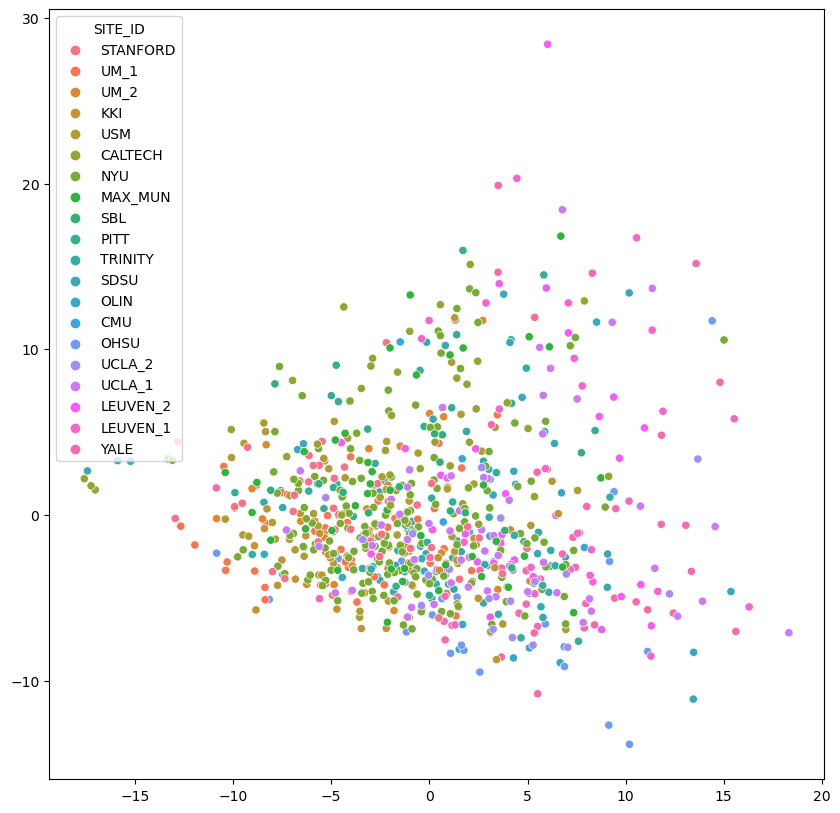

In [12]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
sb.scatterplot(
    x=X_pca[:, 0], y=X_pca[:, 1], 
    hue=pca_df["SITE_ID"].values, 
    hue_order=sorted_PCA.index.values
)
plt.legend(title="SITE_ID")
plt.show()

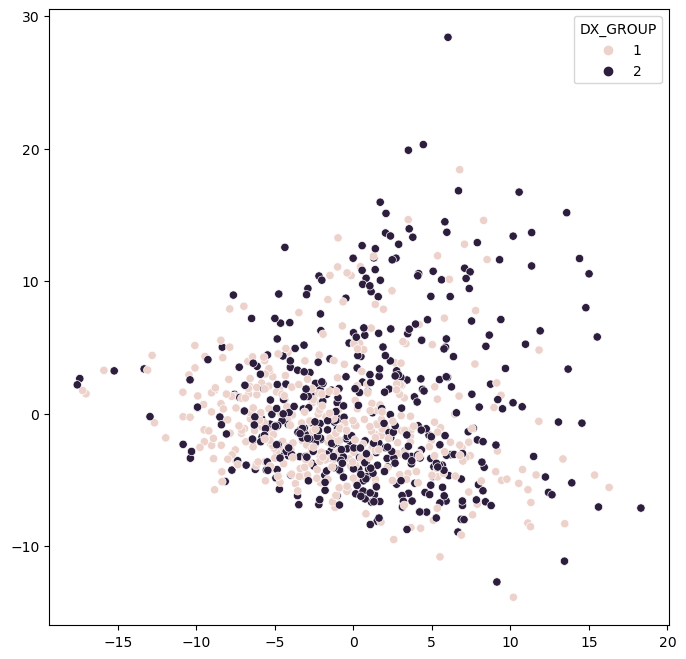

In [13]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))
sb.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=pca_df["DX_GROUP"].values)
plt.legend(title="DX_GROUP")
plt.show()

In [14]:
ica = FastICA(n_components=N, random_state=0)
X_ica = ica.fit_transform(X_flattened)

In [15]:
ica_cols = ["ICA{}".format(i) for i in range(1, N + 1)]
ica_df = pd.DataFrame(X_ica, columns=ica_cols)
ica_df["SUB_ID"] = meta_df["SUB_ID"]
ica_df["SITE_ID"] = meta_df["SITE_ID"]
ica_df["DX_GROUP"] = meta_df["DX_GROUP"]
ica_df["AGE_AT_SCAN"] = meta_df["AGE_AT_SCAN"]
ica_df["SEX"] = meta_df["SEX"]
ica_df.to_csv(os.path.join(main_dir, "ICA.csv"))

In [16]:
sorted_ICA = ica_df.groupby("SITE_ID").agg(["mean", "std"])[ica_cols] \
    .sort_values([(i, "mean") for i in ica_cols])
sorted_ICA

ICA1                ICA2                ICA3          
              mean       std      mean       std      mean       std
SITE_ID                                                             
LEUVEN_2 -0.042745  0.033924  0.007945  0.051757 -0.009651  0.024300
LEUVEN_1 -0.023322  0.035207  0.025250  0.052869  0.015766  0.033034
UCLA_1   -0.018291  0.029030  0.003220  0.037167  0.009855  0.030083
SBL      -0.017397  0.037579  0.002883  0.017822 -0.029058  0.021883
UCLA_2   -0.016127  0.038195 -0.015199  0.019231  0.020831  0.031610
OHSU     -0.012259  0.034929 -0.025468  0.034317  0.027827  0.039828
TRINITY  -0.012100  0.031146 -0.008799  0.023046 -0.001392  0.044015
SDSU     -0.011324  0.047908 -0.000484  0.041275 -0.004135  0.036705
YALE     -0.006869  0.035225  0.008797  0.043695  0.046412  0.036361
PITT     -0.003785  0.026964  0.014431  0.037159 -0.010421  0.029804
NYU       0.000532  0.026748 -0.004415  0.030372 -0.008190  0.027475
CALTECH   0.004200  0.039037  0.028090  0.034892 -0.027726  0.029387
OLIN      0.005945  0.030960 -0.003703  0.036086  0.017986  0.033885
STANFORD  0.006473  0.025462 -0.007162  0.023352 -0.027064  0.023219
CMU       0.006903  0.025645  0.022952  0.031283  0.020911  0.034899
MAX_MUN   0.007133  0.031340  0.009175  0.039938 -0.005289  0.034146
UM_2      0.011084  0.021913 -0.006789  0.025846 -0.015290  0.018728
UM_1      0.015134  0.032667 -0.013106  0.021049 -0.008804  0.019490
KKI       0.028339  0.026860 -0.018026  0.013448  0.013074  0.028188
USM       0.031957  0.023758  0.004422  0.024313  0.007393  0.030565

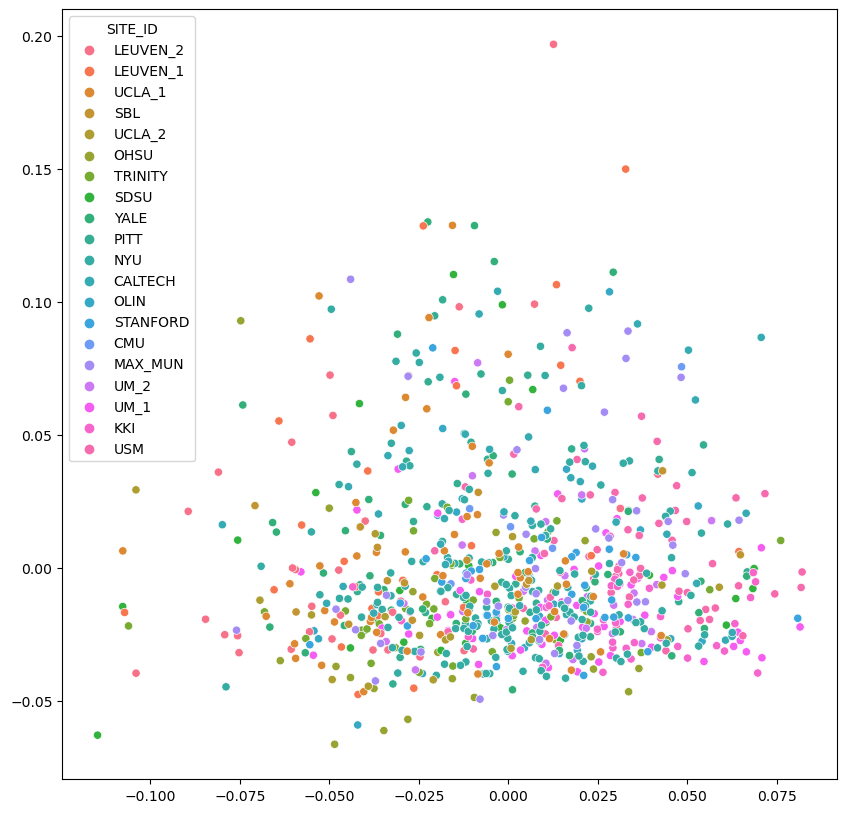

In [17]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
sb.scatterplot(
    x=X_ica[:, 0], y=X_ica[:, 1], 
    hue=ica_df["SITE_ID"].values, 
    hue_order=sorted_ICA.index.values
)
plt.legend(title="SITE_ID")
plt.show()

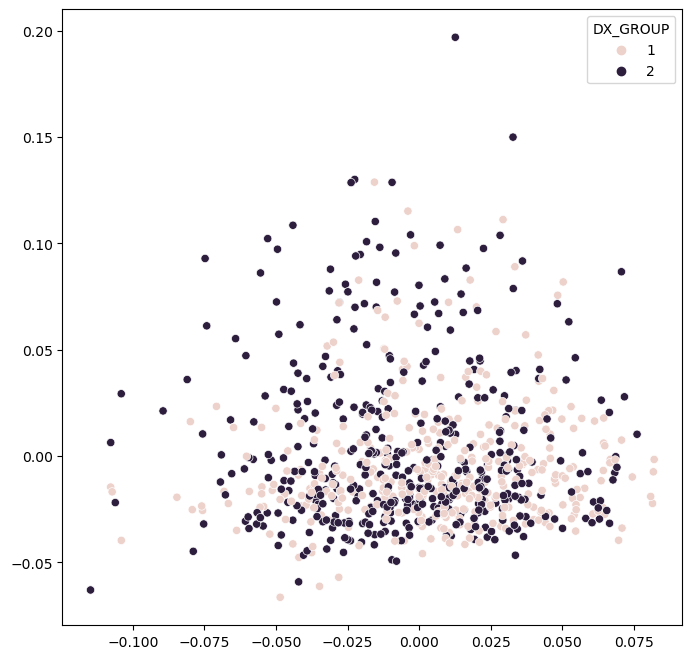

In [18]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))
sb.scatterplot(x=X_ica[:, 0], y=X_ica[:, 1], hue=ica_df["DX_GROUP"].values)
plt.legend(title="DX_GROUP")
plt.show()